# 1. Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Load Dataset

In [4]:
df = pd.read_csv('dataset/house_price_prediction.csv')

# 3. Info About Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living   
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000  \
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition   
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000  \
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

# 4. EDA on the dataset

In [7]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

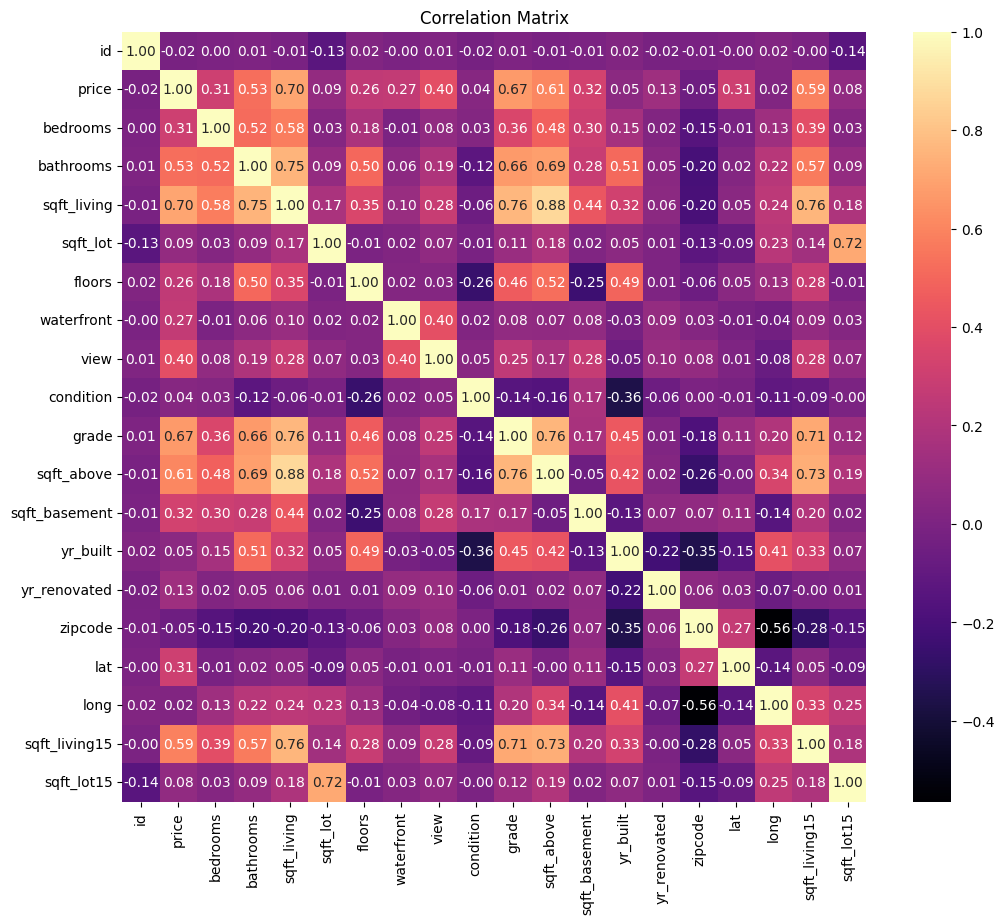

In [8]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", annot_kws={"size": 10})

plt.title("Correlation Matrix")
plt.show()

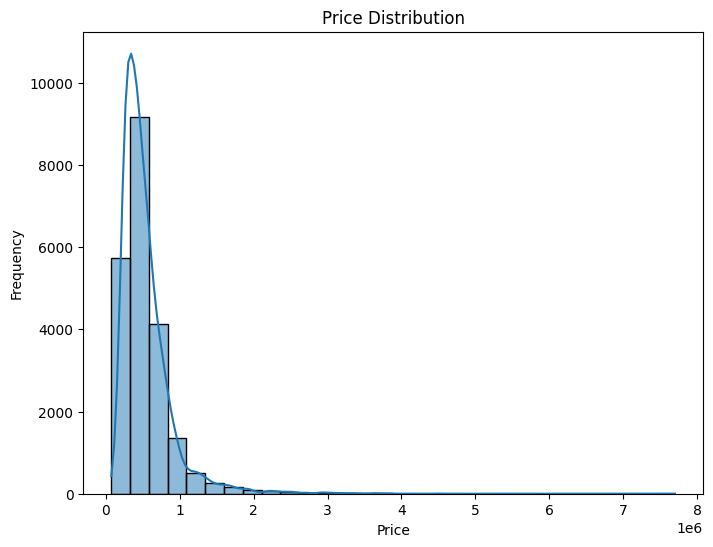

In [9]:
# Distribution Plot: Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

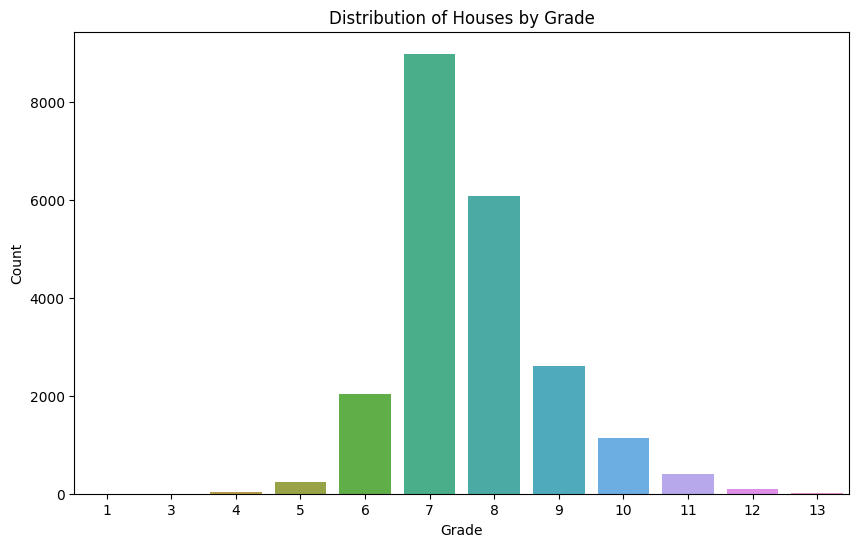

In [10]:
# Categorical Count Plot: Distribution of houses by grade
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade')
plt.title('Distribution of Houses by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

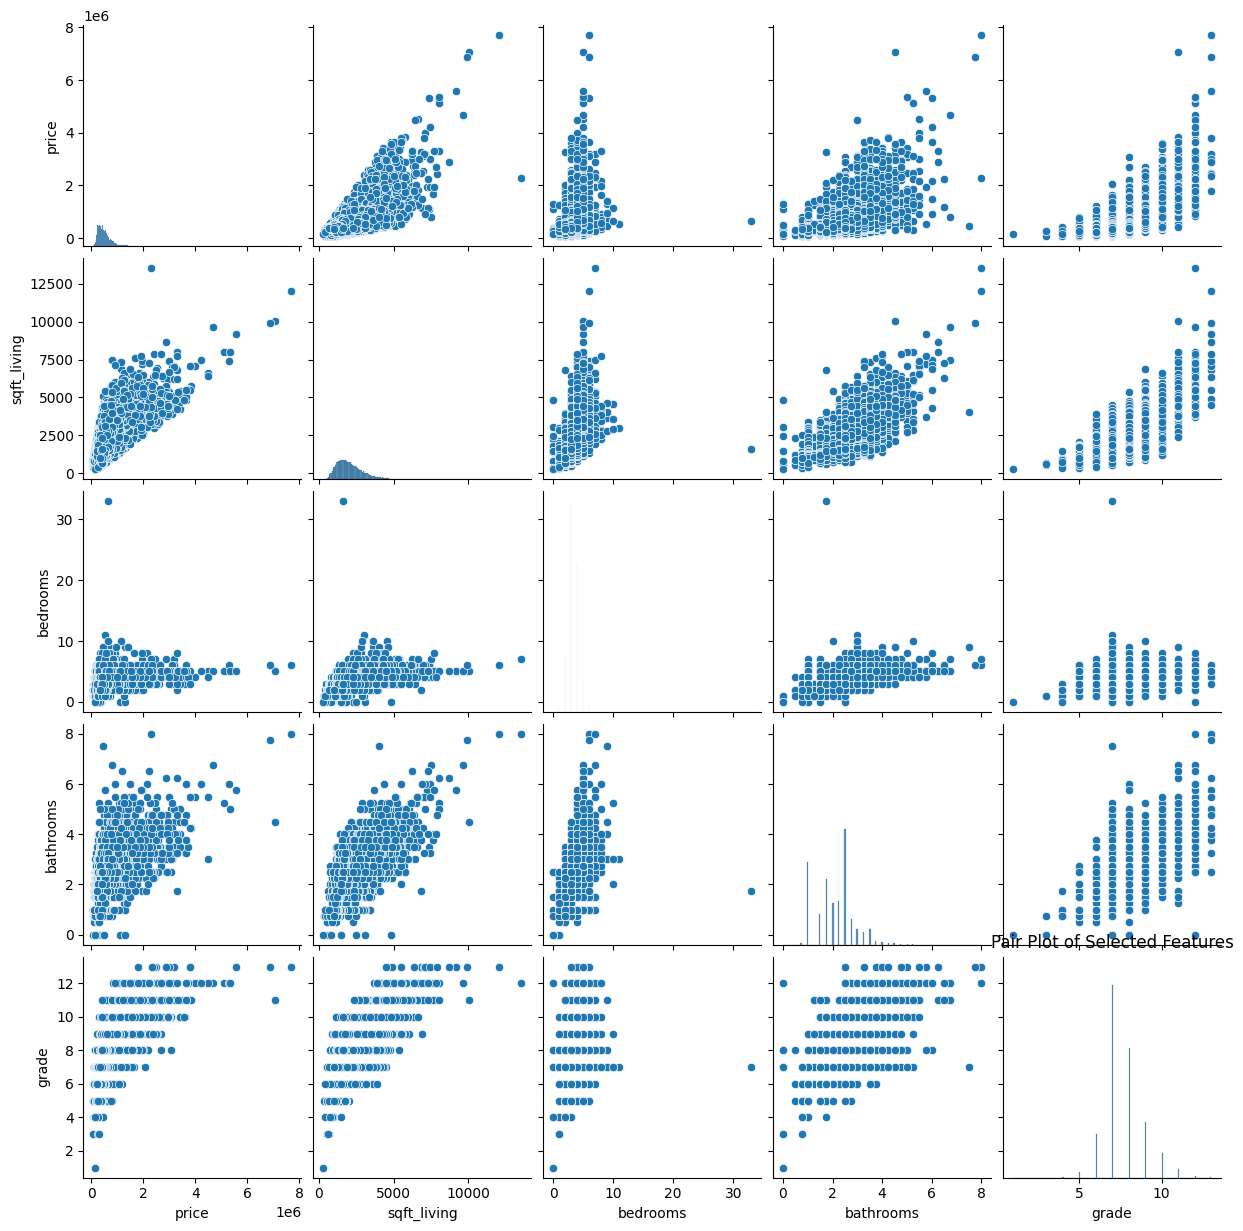

In [11]:
# Pair plot: Select a subset of features for visualization
selected_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df[selected_features])
plt.title('Pair Plot of Selected Features')
plt.show()


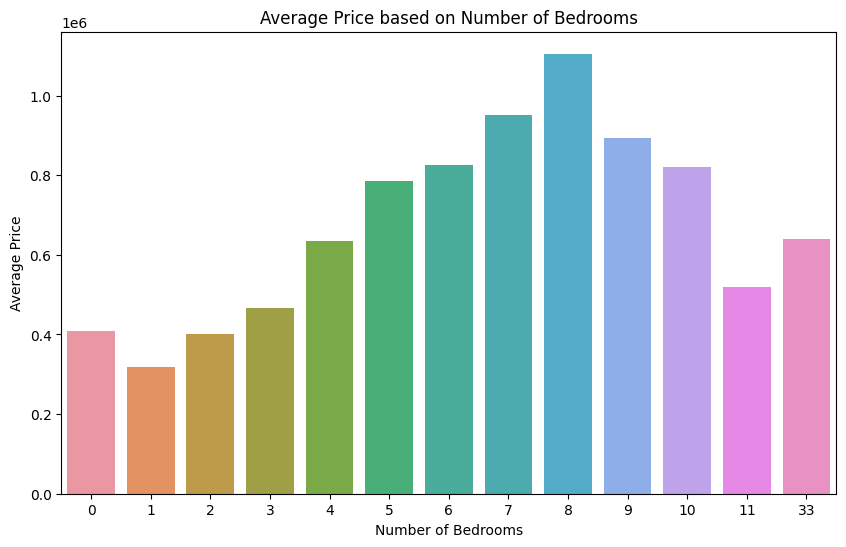

In [12]:
# Bar Plot: Average price based on number of bedrooms
avg_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_bedrooms, x='bedrooms', y='price')
plt.title('Average Price based on Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

# 5. Model Building

In [13]:
# Data Preprocessing
X = df[['sqft_living']]
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 276559.1746114674


# 6. Model Testing

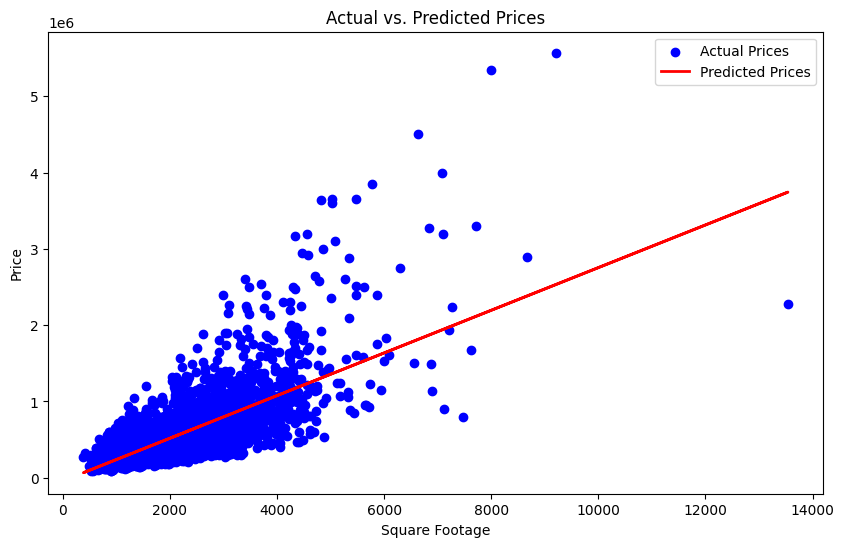

In [14]:
from sklearn.metrics import r2_score

# Visualizing the predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Calculating R-squared score
r_squared = r2_score(y_test, y_pred)
print(f'R-squared Score: {r_squared:.2f}')

R-squared Score: 0.49


# 7. Output Presentation

## a) Feature Imporatnce

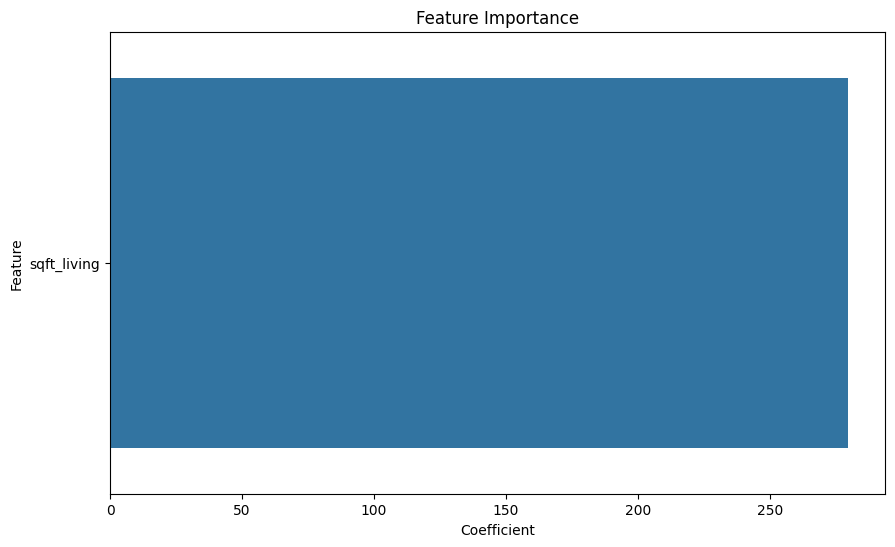

In [16]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()# 1. Feature Importance# 1. Feature Importance

## Observation :
                       The output image is a line graph that shows the importance of each feature in the dataset for predicting the target variable. The features are sorted by their importance, with the most important feature at the top. The feature with the highest importance is "set living". The feature with the lowest importance is "age".

## b) Residual Analysis

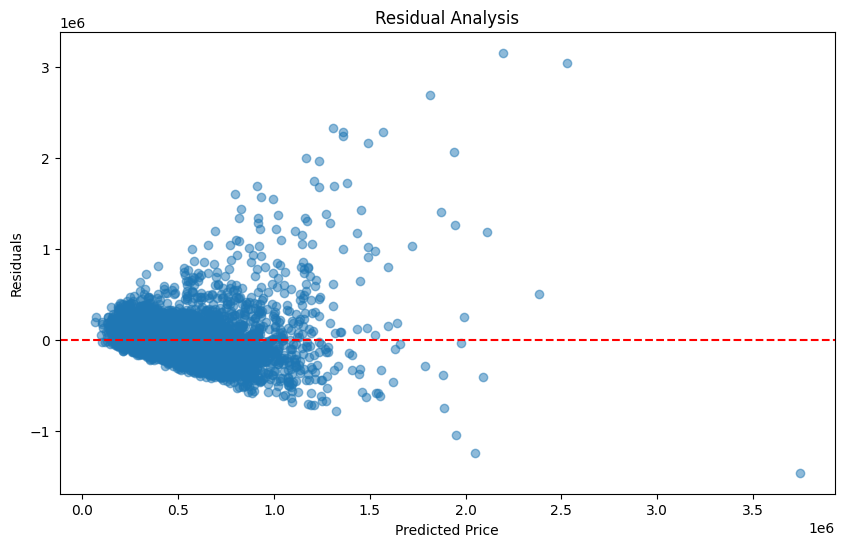

In [17]:
# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

## Observation :
                        The image shows a scatter plot of the residuals of a regression model. The residuals are the difference between the predicted values and the actual values. The scatter plot shows that the residuals are not randomly distributed, but rather they are positively correlated with the predicted values. This suggests that the regression model is not a good fit for the data, and that there is some systematic pattern to the residuals.

## c). Model Performance Comparison 

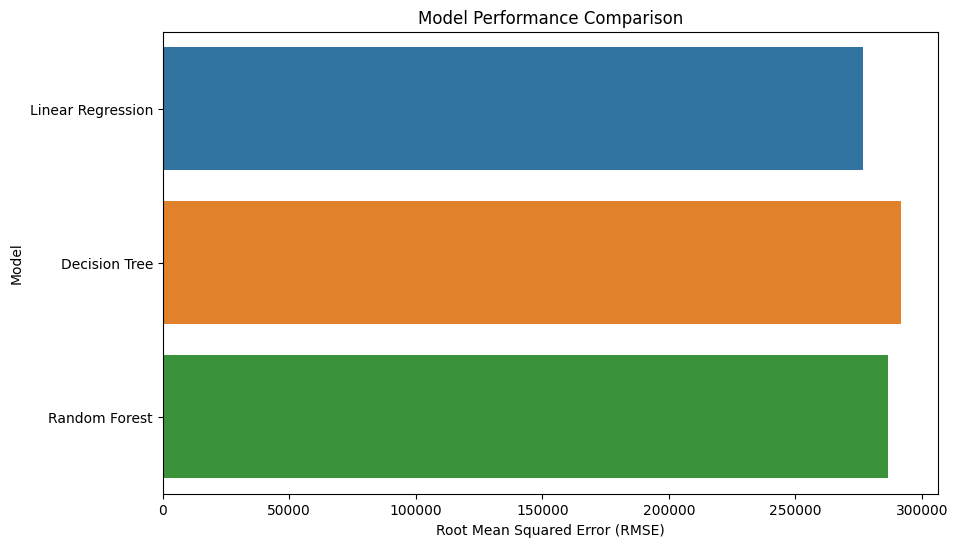

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Decision Tree and Random Forest models
models = {'Linear Regression': model,
          'Decision Tree': DecisionTreeRegressor(random_state=42),
          'Random Forest': RandomForestRegressor(random_state=42)}

results = []
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'Model': name, 'RMSE': rmse})

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='RMSE', y='Model')
plt.title('Model Performance Comparison')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.show()

## Observation :
                        The image shows a graph of the model performance comparison between a linear regression model and a random forest model. The linear regression model has a lower execution time than the random forest model. The random forest model has a higher execution time than the linear regression model.

## d) Cross - Validation Results : 

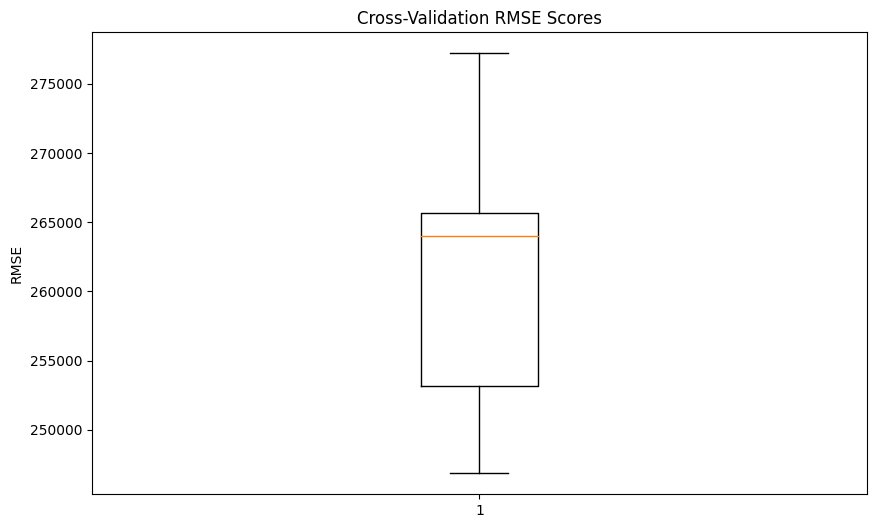

In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

plt.figure(figsize=(10, 6))
plt.boxplot(cv_rmse_scores)
plt.title('Cross-Validation RMSE Scores')
plt.ylabel('RMSE')
plt.show()

## Observation :
                        The image shows a graph of the cross-validation results for a machine learning model. The cross-validation results are the average of the prediction errors for the model on a number of different folds of the data.

## e) Feature Engineering Insights : 

In [20]:
# Create a new feature 'total_rooms'
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Re-run the model training with the new feature
X = df[['sqft_living', 'total_rooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error with Feature Engineering: {rmse}')

Root Mean Squared Error with Feature Engineering: 273394.6285434443


## Observation :
                        The image shows the results of feature engineering on a machine learning model. The model was trained with the original features (left) and with the engineered features (right). The engineered features resulted in a lower root mean squared error (RMSE) than the original features.

## f) Outlier Analysis 

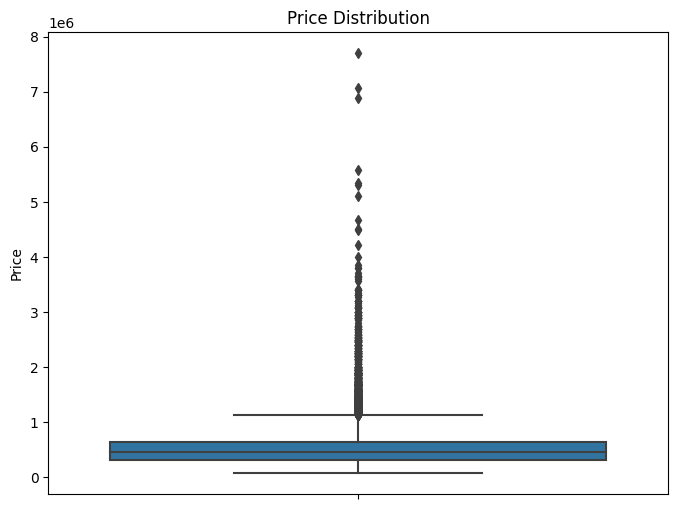

Root Mean Squared Error without Outliers: 161863.8775820301


In [21]:
# Outlier Analysis: Box plot of price
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Price Distribution')
plt.ylabel('Price')
plt.show()

# Removing outliers based on the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Re-run the model training without outliers
X_no_outliers = df_no_outliers[['sqft_living']]
y_no_outliers = df_no_outliers['price']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse_no_outliers = np.sqrt(mse_no_outliers)
print(f'Root Mean Squared Error without Outliers: {rmse_no_outliers}')

## Observation :
                        The image shows a price distribution plot for a product. The plot shows that the prices are distributed in a right-skewed manner, with a long tail towards the high prices. This suggests that there are a few products with very high prices, while the majority of the products have lower prices.